<a href="https://colab.research.google.com/github/Luis20matias/Portfolio/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic: Machine Learning from disaster 
---

This is a classic project that a lot of people use to do. Very often people do it like their first project in data science.


The sinking of the Titanic was on  April 15, 1912. It was widely considered unsinkable, but the ship sank after colliding with an iceberg. This accident resulted in **the death of 1502 out of 2224 passengers and crew**.

> The main question in this challenge is: **“what sorts of people were more likely to survive?”**

---

<p align="center">
  <img src="https://drive.google.com/uc?id=1ecATGo_fbHltbgnhdcDbeH-nQmqQUu92" >
</p>
<p align="center">
<a href='https://www.freepik.com/vectors/water'>Water vector created by vectorpouch - www.freepik.com</a>
</p>

* ## Overview of the dataset
---

This is considered a dataset that are easy to understand, both from the technical point of view and from the understanding of the situation under study. 

The dataset can be found at the site of Kaggle: [Kaggle Titanic dataset](https://www.kaggle.com/c/titanic). 

You find some important information on the site about the data for you to understand the problem. In addition, the data has been split into two parts: test and training. 

The *test dataset* must be used to build a model of machine learning. In this set is informed wether the passenger survived or not.

Meanwhile, the *training dataset* is used to tell how well your model performs on unseen data. In this set isn't informed if the passenger survived or not.

Also is given a model(template) with some answers: **the gender_submission**. This model has an **accuracy of 0.76555**.

### Dictionary of the data
* **Age:** Passenger's age in years.
* **Cabin:** Passenger's cabin number.
* **Embarked:** Port of Embarkation of the passenger.
  * C = CherbouC = Cherbourg
  * Q = Queenstown
  * S = Southampton
* **Fare:** Passenger fare in the ship.
* **Parch:** # of parents / children aboard the Titanic
* **pclass:** Ticket class of the passenger
  * 1 = 1st
  * 2 = 2nd
  * 3 = 3rd
* **Sex:** Sex of the passenger
* **Sibsp:** # of siblings / spouses aboard the Titanic
* **Survival:** Survival
  * 0 = No
  * 1 = Yes
* **Ticket:** Ticket number of the passenger

<br />

---

<br />

* # Objective
---
It is expected to be able to make an analysis of which variables have the greatest influence in one of the most infamous shipwrecks in history.

## Metric
In this competition is indicated that we should use the metric accuracy, that is calculated by the number of accerts by the numbers of examples. 

The score is the percentage of passengers you correctly predict. This is known as accuracy.



---

<br />


* # Notebook
---

The following code is divided into five parts that are listed below.


## Check list

1.   First model.
2.   Second model.
3.   Using cross-validation to build a model
4.   Improving the model.
5.   Building the last model of Machine Learning.
6.   Conclusions of the project.

## Resume of the project

### 1. First model.

In this first part, it is used just the labels Gender and Age to build the model. This assumption was made from the dataset Train, where it can be seen that young women survived the shipwreck. 

### 2.   Second model.

In the second part, it is used the dataset of train and test to validate the model. The Machine Learning classifier used is the Random Forest.

### 3.   Using cross-validation to build a model

In the third part, it is adopted cross-validation which is a technique to evaluate a model's generalizability. It is used to remove that randomness of the dataset. 

### 4.   Improving the model

To improve the model is add new variables in the training and test data to build a model of Machine Learning. The numerical variables add are Sex_binary, Age, P-class, SibSp, Parch, and Fare.

### 5.   Building the last model of Machine Learning.

In this part of the project, we can see some important pieces of information about the dataset. It is seen the data that is classifier in a wrong way. Consequently, it is seen that in this data has a people with 'Miss', 'Mrs', 'Master', 'Col', 'Major' and 'Mr' in their names. Furthermore, a lot of peolpe of this subset hasn't the number of their cabin notified. It should also be mentioned that is used the Machine Learning classifier used is the Support vector machine (SVM) to improve the accuracy of the project.



### 6.   Conclusions of the project.

This final part shows a resume of the result that was achieved in each part of the project.

---

# Part 1: First model.
---

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projeto_Titanic/train.csv') 
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projeto_Titanic/test.csv') 

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model =  RandomForestClassifier(n_estimators=100,n_jobs=-1, random_state=0)

First, we have to assume that just female passengers survived in the shipwreck. In addition, the children were the priority for save.

*   We must see how many females e males are in the chip.



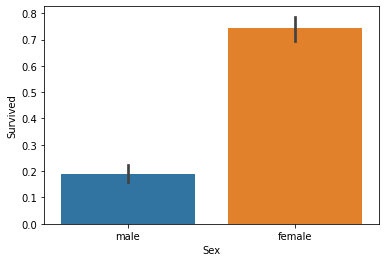

In [4]:
# Plotar os gráficos para Survived vs. Sex
import seaborn as sns
sns.barplot(x='Sex', y='Survived', data=train);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


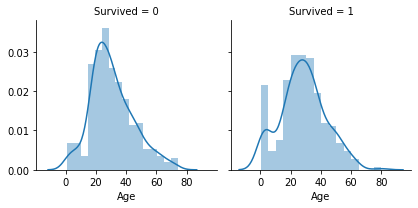

In [6]:
# ver influência da idade na probabilidade de sobrevivência
age_survived = sns.FacetGrid(train, col='Survived');
age_survived.map(sns.distplot, 'Age');

In [ ]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

* Creating a function to convert categorical labels in binary labels.
* map() take the function that I've selected and apply line by line in the column that I've chosen.

In [ ]:
def transform_sex(value):
  if value == 'female':
    return 1
  else:
    return 0

train['Sex_binary'] = train['Sex'].map(transform_sex)

* Choose the variables that we can utilize is a very important task. In the first time, we can see that women and children were priorities for saving during the disaster.

In [ ]:
variable = ['Sex_binary','Age']

* X are the variables used to build a model
* y is the variable that we want to predict

In [ ]:
X = train[variable]
y = train['Survived']

In [ ]:
X.head()

,Sex_binary,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

* Replacing NanN values for -1, because is a new value that did not appear before.
* It's required that we must the preprocessing of the data set before.

In [ ]:
X = X.fillna(-1)

In [ ]:
model.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

* Aplling the model in the test

> We can see that there isn't a variable named Sex_binary, therefore we need to add it to the date set.



In [ ]:
test['Sex_binary'] = test['Sex'].map(transform_sex)

* It is very important have the same sequence of variables in the test and train data set.
* Replacing NaN variables

In [ ]:
X_pred = test[variable]
X_pred = X_pred.fillna(-1)
X_pred.head()

,Sex_binary,Age
0,0,34.5
1,1,47.0
2,0,62.0
3,0,27.0
4,1,22.0


In [ ]:
p = model.predict(X_pred)
p

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

* We want to create a archive to send to the kaggle competition, but we should see first that the data set test doesn't have the Survived column. Thus, we need to add this column.

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


* Changing the array to a pandas Series to add to the data set test.
* Add the name to the columns


In [ ]:
sub = pd.Series(p, index=test['PassengerId'], name ='Survived' ) 
sub

PassengerId
892     0
893     1
894     0
895     1
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 418, dtype: int64

* Creating an archive csv

In [ ]:
sub.to_csv('first_model.csv', header=True)

* Just take a look in the first 10 lines of the archive to check if is all right 

In [ ]:
!head -n10 first_model.csv

PassengerId,Survived
892,0
893,1
894,0
895,1
896,1
897,0
898,1
899,0
900,1


* Below we can see the score of this second model that was submitted in the Kaggle.

<p align="center">
  <img src="https://drive.google.com/uc?id=1bokD61y32NWBdBdEM7gkaRrF7r6nQZ5I" >
</p>

* How could be seen in the image above, the score of 0.71291 is lower than the archive gender_submission (0.76555). 

# Part 2: Second model of machine learning.
---

## Parts of the project that need to be focus:
---
### 1. Train
> * In this step, we build the model.
### 2. Validation
> * We take the trained model and we see how good is it.
> * In this part, the main goal is to adjust some parameters in the project. 
> * Here, we can simulate the reality with data that wasn't used before.
> * We can add or remove parts of the dataset.
### 3. Test
> * This is a dataset that has to be used when the data scientist has the last model of machine learning.
> * In this part, we can check the real performance of the model.

---


### Validation


> * This is one of the most important topics in the project. It must be ok or it can compromise all the work.
 > * Must be noticed that in the real projects we don't have the kaggle to check our score. So, we need to write a code to check it.  


* In this project, we can't what passengers are in the training and test data. Therefore, we can separete them in a random way.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

* In this project, we have little data, about a thousand. So, we will use the test_size = 0.5, wich means we will take half of the data for the test and half for training.

In [ ]:
np.random.seed(0)
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.5)

In [ ]:
X_train.head()

,Sex_binary,Age
213,0,30.0
586,0,47.0
499,0,24.0
821,0,27.0
246,1,25.0


In [ ]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((445, 2), (446, 2), (445,), (446,))

In [ ]:
model =  RandomForestClassifier(n_estimators=100,n_jobs=-1, random_state=0)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
p = model.predict(X_valid)



### Calculating the accuracy.
> *  The accuracy is basically the number of hits (positive) divided by the total number of examples.
> * It is used the real and predicts data in this part.

In [ ]:
np.mean(y_valid == p)

0.7690582959641256

* Comparing the accuracy with the model that all the women survived. So, assuming that all women will survive.


In [ ]:
p = (X_valid['Sex_binary'] == 1).astype(np.int64) # gender submission
np.mean(y_valid == p)

0.7825112107623319

* At this point, we can conclude that the model isn't so good enough yet.
* It's needed to compare and see if the result is  consistent in the real world.

# Part 3 : Using cross-validation to build a model of machine learning.
---

* Cross-validation is a technique to evaluate a model's generalizability, from a dataset. This technique is widely used in problems where the purpose of modeling is the prediction.

* Cross-validation is the partitioning of the dataset into mutually exclusive subsets, and subsequently, the use of some of these subsets to estimate the model parameters (training data), with the remaining subsets (validation) in the model validation.

* Using the concept, we can remove that randomness of the dataset. It's a technique of resampling. 


In [ ]:
from sklearn.model_selection import KFold

In [ ]:
results = []
for rep in range(10):
  print(f'Number repetition: {rep}')  
  kf = KFold(3, shuffle= True, random_state= rep)

  
  for lines_train, lines_valid in kf.split(X):
    print('Train:', lines_train.shape[0])
    print('Validation:', lines_valid.shape[0])
    

    X_train, X_valid = X.iloc[lines_train], X.iloc[lines_valid]
    y_train, y_valid = y.iloc[lines_train], y.iloc[lines_valid]
    #print(X_train.head())
    #print()

    model = RandomForestClassifier(n_estimators=100, n_jobs= -1, random_state= 0)
    model.fit(X_train,y_train)

    p = model.predict(X_valid)
    acc = np.mean(y_valid == p)
    results.append(acc)
    print(f'Accuracy: {acc}')
    print()

Number repetition: 0
Train: 594
Validation: 297
Accuracy: 0.7609427609427609

Train: 594
Validation: 297
Accuracy: 0.7845117845117845

Train: 594
Validation: 297
Accuracy: 0.7643097643097643

Number repetition: 1
Train: 594
Validation: 297
Accuracy: 0.7575757575757576

Train: 594
Validation: 297
Accuracy: 0.7710437710437711

Train: 594
Validation: 297
Accuracy: 0.7878787878787878

Number repetition: 2
Train: 594
Validation: 297
Accuracy: 0.7474747474747475

Train: 594
Validation: 297
Accuracy: 0.7878787878787878

Train: 594
Validation: 297
Accuracy: 0.7777777777777778

Number repetition: 3
Train: 594
Validation: 297
Accuracy: 0.7441077441077442

Train: 594
Validation: 297
Accuracy: 0.7508417508417509

Train: 594
Validation: 297
Accuracy: 0.7777777777777778

Number repetition: 4
Train: 594
Validation: 297
Accuracy: 0.7710437710437711

Train: 594
Validation: 297
Accuracy: 0.7508417508417509

Train: 594
Validation: 297
Accuracy: 0.7373737373737373

Number repetition: 5
Train: 594
Validati

In [ ]:
np.mean(results)

0.7643097643097645

# Part 4: Improving the model.
---

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedKFold

In [ ]:
results = []
kf = RepeatedKFold(n_splits = 2, n_repeats = 10, random_state= 10)


for lines_train, lines_valid in kf.split(X):
  print('Train:', lines_train.shape[0])
  print('Validation:', lines_valid.shape[0])
  

  X_train, X_valid = X.iloc[lines_train], X.iloc[lines_valid]
  y_train, y_valid = y.iloc[lines_train], y.iloc[lines_valid]
  #print(X_train.head())
  #print()

  model = RandomForestClassifier(n_estimators=100, n_jobs= -1, random_state= 0)
  model.fit(X_train,y_train)

  p = model.predict(X_valid)
  acc = np.mean(y_valid == p)
  results.append(acc)
  print(f'Accuracy: {acc}')
  print()


Train: 445
Validation: 446
Accuracy: 0.7869955156950673

Train: 446
Validation: 445
Accuracy: 0.7797752808988764

Train: 445
Validation: 446
Accuracy: 0.827354260089686

Train: 446
Validation: 445
Accuracy: 0.8179775280898877

Train: 445
Validation: 446
Accuracy: 0.7847533632286996

Train: 446
Validation: 445
Accuracy: 0.7842696629213484

Train: 445
Validation: 446
Accuracy: 0.8161434977578476

Train: 446
Validation: 445
Accuracy: 0.7842696629213484

Train: 445
Validation: 446
Accuracy: 0.8004484304932735

Train: 446
Validation: 445
Accuracy: 0.8

Train: 445
Validation: 446
Accuracy: 0.8183856502242153

Train: 446
Validation: 445
Accuracy: 0.802247191011236

Train: 445
Validation: 446
Accuracy: 0.8116591928251121

Train: 446
Validation: 445
Accuracy: 0.8067415730337079

Train: 445
Validation: 446
Accuracy: 0.820627802690583

Train: 446
Validation: 445
Accuracy: 0.7887640449438202

Train: 445
Validation: 446
Accuracy: 0.8385650224215246

Train: 446
Validation: 445
Accuracy: 0.8044943820

### Activating some functions
* It shows all the graphics in just one cell. (%matplotlib inline)
* It gathers various functions(%pylab inline)

In [ ]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
np.mean(results)

0.759601451100922

### Creating a histogram from the list of results made above
* With the histogram is possible to see the deviation in the results. 
* We can see that there are more results around 0.76 or 76 %.

(array([2., 1., 3., 6., 4., 2., 1., 0., 0., 1.]),
 array([0.73542601, 0.74165869, 0.74789137, 0.75412405, 0.76035673,
        0.76658941, 0.77282209, 0.77905477, 0.78528745, 0.79152013,
        0.79775281]),
 <a list of 10 Patch objects>)

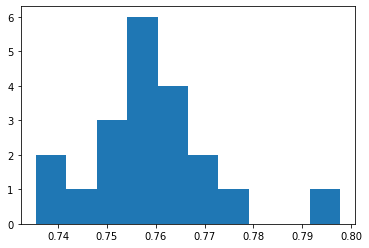

In [ ]:
pylab.hist(results)

### Using new variables

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
variable = ['Sex_binary','Age','Pclass', 'SibSp', 'Parch', 'Fare']

In [ ]:
X = train[variable].fillna(-1)
y = train['Survived']

In [ ]:
results = []
kf = RepeatedKFold(n_splits = 2, n_repeats = 10, random_state= 10)


for lines_train, lines_valid in kf.split(X):
  print('Train:', lines_train.shape[0])
  print('Validation:', lines_valid.shape[0])
  

  X_train, X_valid = X.iloc[lines_train], X.iloc[lines_valid]
  y_train, y_valid = y.iloc[lines_train], y.iloc[lines_valid]
  #print(X_train.head())
  #print()

  model = RandomForestClassifier(n_estimators=100, n_jobs= -1, random_state= 0)
  model.fit(X_train,y_train)

  p = model.predict(X_valid)
  acc = np.mean(y_valid == p)
  results.append(acc)
  print(f'Accuracy: {acc}')
  print()

Train: 445
Validation: 446
Accuracy: 0.7869955156950673

Train: 446
Validation: 445
Accuracy: 0.7797752808988764

Train: 445
Validation: 446
Accuracy: 0.827354260089686

Train: 446
Validation: 445
Accuracy: 0.8179775280898877

Train: 445
Validation: 446
Accuracy: 0.7847533632286996

Train: 446
Validation: 445
Accuracy: 0.7842696629213484

Train: 445
Validation: 446
Accuracy: 0.8161434977578476

Train: 446
Validation: 445
Accuracy: 0.7842696629213484

Train: 445
Validation: 446
Accuracy: 0.8004484304932735

Train: 446
Validation: 445
Accuracy: 0.8

Train: 445
Validation: 446
Accuracy: 0.8183856502242153

Train: 446
Validation: 445
Accuracy: 0.802247191011236

Train: 445
Validation: 446
Accuracy: 0.8116591928251121

Train: 446
Validation: 445
Accuracy: 0.8067415730337079

Train: 445
Validation: 446
Accuracy: 0.820627802690583

Train: 446
Validation: 445
Accuracy: 0.7887640449438202

Train: 445
Validation: 446
Accuracy: 0.8385650224215246

Train: 446
Validation: 445
Accuracy: 0.8044943820

* It is possible to see that the results improve. Before, the minimum and maximum results were 0.74 and 0.80, respectively, and now they are 0.78 and 0.84.

* The mean of the results are better than before with 80.4145 %.

In [ ]:
np.mean(results)

0.8041457147175896

(array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
 array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
        0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
        0.83856502]),
 <a list of 10 Patch objects>)

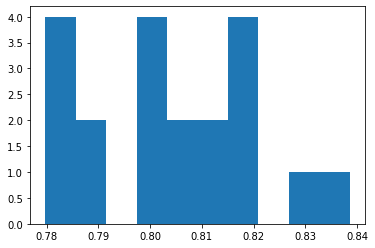

In [ ]:
pylab.hist(results)

### Retraining the model
* Creating a new model (retraining the model) using all the dataset for make a document. The aim is to send to kaggle to make a new submission.

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projeto_Titanic/train.csv') 
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projeto_Titanic/test.csv') 

train['Sex_binary'] = train['Sex'].map(transform_sex)
test['Sex_binary'] = test['Sex'].map(transform_sex)

variable = ['Sex_binary','Age','Pclass', 'SibSp', 'Parch', 'Fare']

X = train[variable].fillna(-1)
y = train['Survived']

In [ ]:
test[variable].head()

,Sex_binary,Age,Pclass,SibSp,Parch,Fare
0,0,34.5,3,0,0,7.8292
1,1,47.0,3,1,0,7.0000
2,0,62.0,2,0,0,9.6875
3,0,27.0,3,0,0,8.6625
4,1,22.0,3,1,1,12.2875


In [ ]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
model.fit(X,y)

p = model.predict(test[variable].fillna(-1))

In [ ]:
second_sub = pd.Series(p, index = test['PassengerId'], name = 'Survived')
second_sub.shape

(418,)

In [ ]:
second_sub.to_csv('second_model.csv', header= True)

In [ ]:
!head -n10 second_model.csv

PassengerId,Survived
892,0
893,0
894,1
895,1
896,0
897,0
898,0
899,0
900,1





* Below we can see the score of this second model that was submitted in the Kaggle.

<p align="center">
  <img src="https://drive.google.com/uc?id=1wb1HwpSwQUH-hmIQteCTS7AAOQEabGpB" >
</p>

* How could be seen in the image above, the score improve to 0.74641, but is still lower than the archive gender_submission (0.76555). 
 
* Could be seen that with just the numerical variables the model doesn't work very well. 



# Part 5: Building the last model of Machine Learning.
---

> * In this part of the project, we can see some important pieces of information about the dataset. These pieces of information can improve our model of Machine Learning.
> * This is the most important part of a data science project.
> * Here is possible to see the knowleged about the problem from the data scientist.

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
%pylab inline
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
train['Sex_binary'] = train['Sex'].map(transform_sex)
test['Sex_binary'] = test['Sex'].map(transform_sex)


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


## Error analysis

> * We need to take a set of the data and see the evaluation of them. Try to see where the model is getting wrong in a way to find any patterns.

In [ ]:
results = []
kf = RepeatedKFold(n_splits = 2, n_repeats = 10, random_state= 10)


for lines_train, lines_valid in kf.split(X):
  print('Train:', lines_train.shape[0])
  print('Validation:', lines_valid.shape[0])
  

  X_train, X_valid = X.iloc[lines_train], X.iloc[lines_valid]
  y_train, y_valid = y.iloc[lines_train], y.iloc[lines_valid]

  model = RandomForestClassifier(n_estimators=100, n_jobs= -1, random_state= 0)
  model.fit(X_train,y_train)

  p = model.predict(X_valid)
  
  acc = np.mean(y_valid == p)
  results.append(acc)
  print(f'Accuracy: {acc}')
  print()

Train: 445
Validation: 446
Accuracy: 0.7690582959641256

Train: 446
Validation: 445
Accuracy: 0.7910112359550562

Train: 445
Validation: 446
Accuracy: 0.8228699551569507

Train: 446
Validation: 445
Accuracy: 0.8

Train: 445
Validation: 446
Accuracy: 0.7982062780269058

Train: 446
Validation: 445
Accuracy: 0.802247191011236

Train: 445
Validation: 446
Accuracy: 0.8071748878923767

Train: 446
Validation: 445
Accuracy: 0.7910112359550562

Train: 445
Validation: 446
Accuracy: 0.8183856502242153

Train: 446
Validation: 445
Accuracy: 0.8112359550561797

Train: 445
Validation: 446
Accuracy: 0.8116591928251121

Train: 446
Validation: 445
Accuracy: 0.8067415730337079

Train: 445
Validation: 446
Accuracy: 0.8228699551569507

Train: 446
Validation: 445
Accuracy: 0.8112359550561797

Train: 445
Validation: 446
Accuracy: 0.7825112107623319

Train: 446
Validation: 445
Accuracy: 0.802247191011236

Train: 445
Validation: 446
Accuracy: 0.827354260089686

Train: 446
Validation: 445
Accuracy: 0.8089887640

* Take the last set of data. The lines of the train refer to the dataset of validations.
*  Put the predictions in a column of this dataframe.
* Important information:
> .copy() - The copy() method returns a shallow copy of the list.  If you need the original list unchanged when the new list is modified, you can use the copy() metho

* We can do this test in a random set of the total dataset.

In [ ]:
X_valid_check = train.iloc[lines_valid].copy()
X_valid_check['p'] = p
X_valid_check.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary,p
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [ ]:
X_valid_check.shape

(445, 14)

* Creating a dataframe with all wrong predictions.
* Columns 'p' and 'Survived' are side by side to facilitate analysis.
* One tip is to see an isolated group in try to take some insight.

In [ ]:
errors = X_valid_check[X_valid_check['Survived'] != X_valid_check['p']]
errors = errors[['PassengerId','Pclass','Name','Sex','Age','SibSp',
                 'Parch','Ticket','Fare','Cabin','Embarked','Sex_binary','p','Survived']]
errors.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary,p,Survived
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1
21,22,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,0,0,1
22,23,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,1,0,1
23,24,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,0,0,1
25,26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,1,0,1


* Until now is known that all the women survived. So, let's separate between the men and women groups.

In [ ]:
women = errors[errors['Sex'] == 'female']
men = errors[errors['Sex'] == 'male']

* Sort by the values along the "Survived" axis.
* It is possible to assess the miss values in the Cabin.
* Column 'Ticket' has numbers and letters. Due to this, it is better to check the necessity of this column to create the model.
* Column 'Embarked' wasn't seen before too.
>  In this part any no idea is bad. All of them are useful if can be used to predict.

In [ ]:
women.sort_values("Survived")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary,p,Survived
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,1,0
501,502,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q,1,1,0
498,499,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,1,1,0
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,1,1,0
474,475,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S,1,1,0
419,420,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S,1,1,0
357,358,2,"Funk, Miss. Annie Clemmer",female,38.0,0,0,237671,13.0000,NaN,S,1,1,0
254,255,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,NaN,S,1,1,0
503,504,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S,1,1,0
654,655,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,NaN,Q,1,1,0


In [ ]:
men.sort_values("Survived")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary,p,Survived
238,239,2,"Pengelly, Mr. Frederick William",male,19.00,0,0,28665,10.5000,NaN,S,0,1,0
442,443,3,"Petterson, Mr. Johan Emil",male,25.00,1,0,347076,7.7750,NaN,S,0,1,0
422,423,3,"Zimmerman, Mr. Leo",male,29.00,0,0,315082,7.8750,NaN,S,0,1,0
373,374,1,"Ringhini, Mr. Sante",male,22.00,0,0,PC 17760,135.6333,NaN,C,0,1,0
371,372,3,"Wiklund, Mr. Jakob Alfred",male,18.00,1,0,3101267,6.4958,NaN,S,0,1,0
698,699,1,"Thayer, Mr. John Borland",male,49.00,1,1,17421,110.8833,C68,C,0,1,0
262,263,1,"Taussig, Mr. Emil",male,52.00,1,1,110413,79.6500,E67,S,0,1,0
231,232,3,"Larsson, Mr. Bengt Edvin",male,29.00,0,0,347067,7.7750,NaN,S,0,1,0
214,215,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,NaN,Q,0,1,0
721,722,3,"Jensen, Mr. Svend Lauritz",male,17.00,1,0,350048,7.0542,NaN,S,0,1,0


## New variables

>* Applying some ideas of the exploratory analysis.

* This variable ('Q') can be removed, because if it is not some of the two above, it will be this as a consequence.
* .astype() - Cast a pandas object to a specified dtype dtype.
* .isnull()- return a boolean same-sized object indicating if the values are NA.
* Verifying names with some titles as Miss, Major and Mr.

In [ ]:
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
# train['Embarked_Q'] = (train['Embarked']== 'Q').astype(int)

train['Cabin_null'] = train['Cabin'].isnull().astype(int)

# Women
train['Name_contain_Miss'] = train['Name'].str.contains('Miss').astype(int)
train['Name_contain_Mrs'] = train['Name'].str.contains('Mrs').astype(int)

# Men
train['Name_contain_Master'] = train['Name'].str.contains('Master').astype(int)
train['Name_contain_Col'] = train['Name'].str.contains('Col').astype(int)
train['Name_contain_Major'] = train['Name'].str.contains('Major').astype(int)
train['Name_contain_Mr'] = train['Name'].str.contains('Mr').astype(int)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary,Embarked_S,Embarked_C,Cabin_null,Name_contain_Miss,Name_contain_Mrs,Name_contain_Master,Name_contain_Col,Name_contain_Major,Name_contain_Mr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,1,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0,1,1,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0,1,0,0,0,0,0,1


In [ ]:
variables = ['Sex_binary', 'Age','Pclass','SibSp', 'Parch','Fare','Embarked_S','Embarked_C','Cabin_null',
             'Name_contain_Miss','Name_contain_Mrs',
             'Name_contain_Master','Name_contain_Col','Name_contain_Major','Name_contain_Mr']

X = train[variables].fillna(-1)
y = train['Survived']

* Testing Logistic Regression, a simple model compared to the random forest

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
results2 = []
kf = RepeatedKFold(n_splits = 2, n_repeats = 10, random_state= 0)


for lines_train, lines_valid in kf.split(X):
  print('Train:', lines_train.shape[0])
  print('Validation:', lines_valid.shape[0])
  

  X_train, X_valid = X.iloc[lines_train], X.iloc[lines_valid]
  y_train, y_valid = y.iloc[lines_train], y.iloc[lines_valid]

  # model = RandomForestClassifier(n_estimators=100, n_jobs= -1, random_state= 0)
  # model = DecisionTreeClassifier(criterion='gini', random_state=0)
  model = SVC(kernel = 'linear', random_state = 1, C = 1.0 )
  #model = LogisticRegression(solver= 'newton-cg', multi_class = 'multinomial',n_jobs = -1)
  model.fit(X_train,y_train)

  p = model.predict(X_valid)
  
  acc = np.mean(y_valid == p)
  results2.append(acc)
  print(f'Accuracy: {acc}')
  print()

Train: 445
Validation: 446
Accuracy: 0.8183856502242153

Train: 446
Validation: 445
Accuracy: 0.8337078651685393

Train: 445
Validation: 446
Accuracy: 0.804932735426009

Train: 446
Validation: 445
Accuracy: 0.8134831460674158

Train: 445
Validation: 446
Accuracy: 0.8026905829596412

Train: 446
Validation: 445
Accuracy: 0.8314606741573034

Train: 445
Validation: 446
Accuracy: 0.804932735426009

Train: 446
Validation: 445
Accuracy: 0.8224719101123595

Train: 445
Validation: 446
Accuracy: 0.7825112107623319

Train: 446
Validation: 445
Accuracy: 0.8224719101123595

Train: 445
Validation: 446
Accuracy: 0.804932735426009

Train: 446
Validation: 445
Accuracy: 0.8202247191011236

Train: 445
Validation: 446
Accuracy: 0.804932735426009

Train: 446
Validation: 445
Accuracy: 0.8292134831460675

Train: 445
Validation: 446
Accuracy: 0.7982062780269058

Train: 446
Validation: 445
Accuracy: 0.8584269662921349

Train: 445
Validation: 446
Accuracy: 0.8295964125560538

Train: 446
Validation: 445
Accuracy

* Plotting the new (blue) and previous(orange) histogram

((array([1., 0., 6., 0., 4., 4., 4., 0., 0., 1.]),
  array([0.78251121, 0.79010279, 0.79769436, 0.80528594, 0.81287751,
         0.82046909, 0.82806066, 0.83565224, 0.84324382, 0.85083539,
         0.85842697]),
  <a list of 10 Patch objects>),
 (array([1., 0., 1., 2., 0., 4., 5., 3., 1., 3.]),
  array([0.7690583 , 0.77488789, 0.78071749, 0.78654709, 0.79237668,
         0.79820628, 0.80403587, 0.80986547, 0.81569507, 0.82152466,
         0.82735426]),
  <a list of 10 Patch objects>))

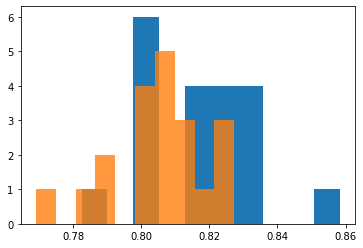

In [ ]:
pylab.hist(results2), pylab.hist(results,alpha= 0.8)

In [ ]:
np.mean(results2)

0.817519272434121

In [ ]:
test['Embarked_S'] = (test['Embarked'] == 'S').astype(int)
test['Embarked_C'] = (test['Embarked'] == 'C').astype(int)
#train['Embarked_Q'] = (train['Embarked']== 'Q').astype(int)

test['Cabin_null'] = test['Cabin'].isnull().astype(int)

# Women
test['Name_contain_Miss'] =test['Name'].str.contains('Miss').astype(int)
test['Name_contain_Mrs'] = test['Name'].str.contains('Mrs').astype(int)

# Men
test['Name_contain_Master'] = test['Name'].str.contains('Master').astype(int)
test['Name_contain_Col'] = test['Name'].str.contains('Col').astype(int)
test['Name_contain_Major'] = test['Name'].str.contains('Major').astype(int)
test['Name_contain_Mr'] = test['Name'].str.contains('Mr').astype(int)

model = SVC(kernel = 'linear', random_state = 1, C = 1.0 )

# Creating a model with entire dataset
model.fit(X,y)
p = model.predict(test[variables].fillna(-1))


## Creating submission



In [ ]:
sub = pd.Series(p, index = test['PassengerId'], name = 'Survived')
sub.shape

(418,)

In [ ]:
sub.to_csv('third_model_final.csv',header = True)

* Below we can see the score of this third model that was submitted in the Kaggle.

<p align="center">
  <img src="https://drive.google.com/uc?id=1GuDzUR_de9Azh03tTD4UCi-5qpGW9d4M" >
</p>

* How could be seen in the image above, the score improve to 0.77511. 


# Part 6: Conclusions of the project
___ 

The sinking of the Titanic was on  April 15, 1912. This accident resulted in **the death of 1502 out of 2224 passengers and crew**. This project is expected to be able to make an analysis of which variables have the greatest influence in one of the most infamous shipwrecks in history and find the accuracy in the classification on the people that survived or not. The dataset used for this project is taken from **[Kaggle](https://www.kaggle.com/c/titanic)**.

In **first part**, it is used just the labels Gender and Age to build the model. This assumption was made from the dataset Train. The accuracy obtained is *0.71291* which is lower than the archive gender_submission (0.76555).

In the **second part**, it is used the dataset of train and test to validate the model. The Machine Learning classifier used is the **[Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier)**. In spite of this fact, the accuracy calculate is *0.76906*.

The **third part** is used the cross-validation, a technique of resampling, to remove that randomness of the dataset. It's used the **[K-Folds cross-validator](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)** from the scikit learn that provides s train/test indices to split data in train/test sets. The mean of the accuracies found is *0.764310*.

The **fourth part** is to add new variables in the training and test data to build a model of Machine Learning. The numerical variables add are Sex_binary, Age, P-class, SibSp, Parch, and Fare. It's used the **[RepeatedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedKFold.html)** that repeats K-Fold n times with different randomization in each repetition. In spite of this fact, the accuracy calculate is *0.74641*.

Finally, the **fifth part** it is seen the data that is classifier in a wrong way. Consequently, it is seen that in this data has a people with *'Miss', 'Mrs', 'Master', 'Col', 'Major' and 'Mr'* in their names. Furthermore, a lot of peolpe of this subset hasn't the number of their cabin notified. The **[Support vector machine (SVM)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)** to improve the accuracy of the project. On the whole, the accuracy in this part is *0.77511*, the best one in this project is bigger than the archive gender_submission



